In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import glob
import nltk
nltk.download('punkt')
from copy import deepcopy
import torch

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
with open("/content/drive/MyDrive/CMSC848Q/multilingual-qa-bias/question_vectors/f1_vecs_1000") as f:
  em_dict = json.load(f)

In [36]:
all_lang = set()
for em in em_dict:
  for la in em:
    all_lang.add(la)

len(all_lang), all_lang

(46,
 {'af',
  'ar',
  'bg',
  'bn',
  'ca',
  'cs',
  'cy',
  'da',
  'de',
  'el',
  'en',
  'es',
  'et',
  'fa',
  'fi',
  'fr',
  'gu',
  'hi',
  'hr',
  'hu',
  'id',
  'it',
  'ja',
  'ko',
  'lt',
  'lv',
  'mr',
  'nl',
  'no',
  'pl',
  'pt',
  'ro',
  'ru',
  'sk',
  'sl',
  'so',
  'sq',
  'sv',
  'sw',
  'ta',
  'te',
  'th',
  'tl',
  'tr',
  'vi',
  'zh'})

In [17]:
all_lang = list(all_lang)

In [18]:
all_em_res = []
for em in em_dict:
  all_em_res.append([em[la] for la in all_lang])

In [19]:
all_em_res = np.array(all_em_res)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

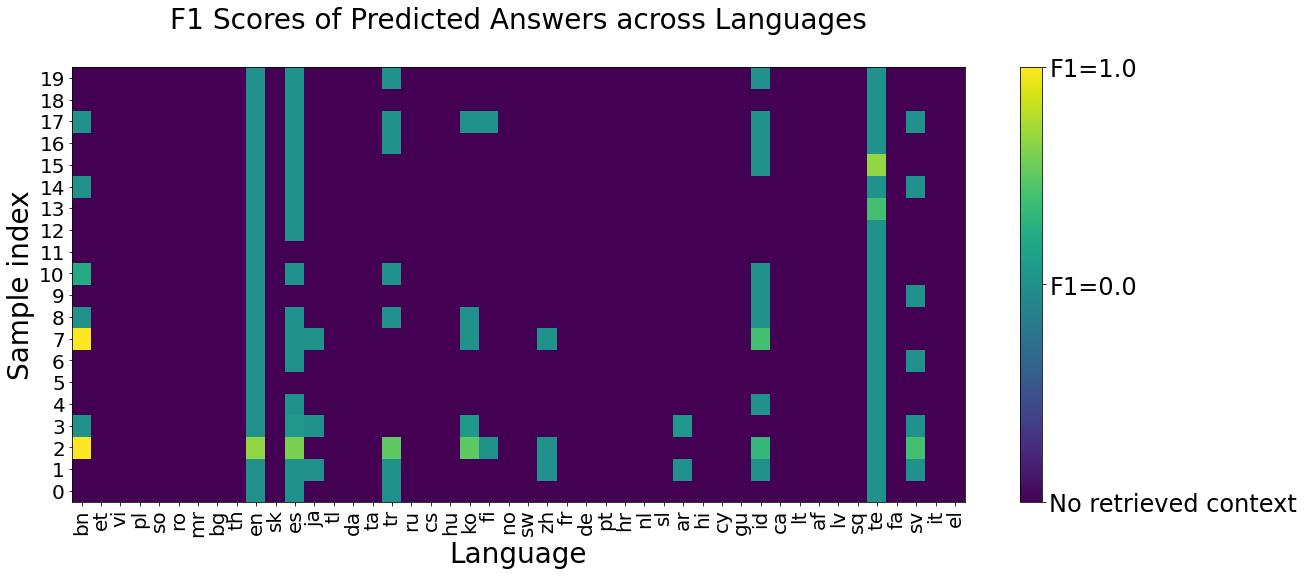

In [35]:
# fig, ax = plt.subplots(figsize=(8,10))
fig, ax = plt.subplots(figsize=(20,8))
# im = ax.imshow(all_em_res[:20])
# plt.colorbar(im)
heatmap = ax.pcolor(all_em_res[:20])

cbar = plt.colorbar(heatmap)
cbar.ax.get_yaxis().set_ticks([-1, 0, 1])
cbar.ax.get_yaxis().set_ticklabels(["No retrieved context", "F1=0.0", "F1=1.0"], fontsize=24)

ax.set_xticks(np.arange(len(all_lang))+0.5)
ax.set_xticklabels(all_lang, rotation='vertical', fontsize=20)
ax.set_yticks(np.arange(20)+0.5)
ax.set_yticklabels(np.arange(20), fontsize=28)
ax.set_ylabel("Sample index", fontsize=28)
ax.set_xlabel("Language", fontsize=28)
ax.set_title("F1 Scores of Predicted Answers across Languages\n", fontsize=28)
plt.yticks(fontsize=20)

In [ ]:
em_dict[17]

{'ar': -1,
 'bn': -1,
 'de': -1,
 'en': -1,
 'es': 1,
 'et': -1,
 'fi': -1,
 'id': -1,
 'ko': -1,
 'ru': 0,
 'sv': -1,
 'te': -1,
 'tr': -1}

In [ ]:
with open("/content/drive/MyDrive/CMSC848Q/multilingual-qa-bias/mDPR/xor_dev_dpr_retrieval_xlingual_samples.json") as f:
  xlingual_samples = json.load(f)

In [ ]:
xlingual_samples[34]

[{'answers': ['200'],
  'context': {'ctx_lang': 'en',
   'has_answer': True,
   'id': '12850865',
   'score': '42.407166',
   'text': 'older, except military personnel on active duty and a few high judicial officials, are eligible for election. The regular parliamentary term is four years; however, the president may dissolve the eduskunta and order new elections at the request of the prime minister and after consulting the speaker of parliament. The parliament has, since equal and common suffrage was introduced in 1906, been dominated by secular Conservatives, the Centre Party (former Agrarian Union), and Social Democrats. Nevertheless, none of these has held a single-party majority, with the notable exception of 1916 elections where Social Democrats gained 103 of the 200 seats.',
   'title': 'Politics of Finland'},
  'lang': 'en',
  'orig_lang': 'fi',
  'orig_qn': 'Kuinka monta politikkoa on Suomen eduskunnassa?',
  'q_id': '-1587863869072967041',
  'question': 'How many politicians a

In [ ]:
with open("/content/drive/MyDrive/CMSC848Q/multilingual-qa-bias/question_vectors/f1_vecs") as f:
  f1_dict = json.load(f)

In [ ]:
vec_sum = np.sum(np.abs(all_em_res), axis=1)
all_correct = np.ones_like(vec_sum) * len(all_lang)
all_correct - vec_sum

array([5, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 3, 1, 2, 0, 1, 1,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 5, 1, 3, 4, 0,
       3, 2, 0, 2, 0, 3, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 3, 3, 2, 2,
       3, 1, 1, 1, 2, 3, 2, 1, 2, 2, 3, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0,
       2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 3, 3, 1,
       2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 3, 1, 1, 2, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0])

In [ ]:
num_of_correct = np.where(all_em_res==1, 1, 0)
num_of_correct = np.sum(num_of_correct, axis=1)
num_of_incorrect = np.where(all_em_res==0, 1, 0)
num_of_incorrect = np.sum(num_of_incorrect, axis=1)

In [ ]:
num_of_inconsistent = np.sum(np.where(num_of_correct * num_of_incorrect > 0, 1, 0))

In [ ]:
num_of_inconsistent

79

In [ ]:
inconsistent_indices = np.where(num_of_correct * num_of_incorrect > 0, 1, 0)

In [ ]:
with open("/content/drive/MyDrive/CMSC848Q/multilingual-qa-bias/answers_lst") as f:
  ans_lst = json.load(f)

In [ ]:
ans_lst['145']

[{'answers': ['29개', '29', '29'],
  'context': '나누기도 한다. 고대불어는 라틴어에서 분화한 여러 로망스어 방언 중 북부 프랑스의 오일어 방언, 특히 프랑시앵(francien) 방언을 일컫는 것이며, 중기 프랑스어는 고대와 근대의 과도기적 형태이며, 근대불어는 프랑스사에서 대세기()이라 불리는 17세기에 플레야드, 몰리에르 등의 고전주의 작가들이 라틴어와 이탈리아어의 문법과 어휘를 받아들여 완성한 것이기에 중기 프랑스어와는 확연한 차이가 나게 된다. 17세기 작가 장 드 라퐁텐의 우화집의 원문을 프랑스의 아동들도 읽을 수 있을 정도로 근대불어는 현대에 와서도 거의 변하지 않은 데 비하여 중기불어는 직해하기가 좀 더 어려워지고, 고대 프랑스어는 전문지식이 없으면 불어 원어민도 독해할 수 없다. 프랑스어는 29개 나라에서 공식 언어로 지정되어 있고, 그 중 대부분의 나라가 프랑스어를 사용하는 커뮤니티인 프랑코포니를 구성한다. 또한 국제',
  'lang': 'ko',
  'pred_answer': '29',
  'question': '프랑스어를 국어로 사용하는 국가는 몇 개국인가?',
  'score': '38.419136',
  'source_lang': 'ko'},
 {'answers': ['Dua puluh sembilan.', '29', '29'],
  'context': 'Bahasa Perancis ("le français", "la langue française") merupakan antara bahasa Rumi yang berasal dari Perancis, Belgium, Luxembourg dan Switzerland dan kini dituturkan oleh lebih 300 juta orang di seluruh dunia sebagai bahasa ibunda atau bahasa kedua. Bahasa Perancis berasal daripada bahasa Latin Empayar Rom.

In [ ]:
ret = []
for idx, c in enumerate(inconsistent_indices):
  if c == 1:
    ret.append(idx)

In [ ]:
print(ret)

[1, 2, 4, 5, 6, 7, 8, 10, 17, 20, 21, 22, 24, 26, 27, 30, 33, 34, 36, 37, 38, 40, 44, 45, 50, 51, 52, 53, 54, 59, 61, 62, 64, 65, 66, 67, 68, 69, 72, 73, 79, 80, 82, 84, 85, 90, 91, 92, 95, 97, 100, 101, 102, 103, 105, 106, 108, 109, 111, 112, 114, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 130, 131, 134, 138, 139, 140, 144]


In [ ]:
print(ret[:20])
print(ret[20:40])
print(ret[40:60])
print(ret[60:])

[1, 2, 4, 5, 6, 7, 8, 10, 17, 20, 21, 22, 24, 26, 27, 30, 33, 34, 36, 37]
[38, 40, 44, 45, 50, 51, 52, 53, 54, 59, 61, 62, 64, 65, 66, 67, 68, 69, 72, 73]
[79, 80, 82, 84, 85, 90, 91, 92, 95, 97, 100, 101, 102, 103, 105, 106, 108, 109, 111, 112]
[114, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 130, 131, 134, 138, 139, 140, 144]
